In [2]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel("Data/neis-data-dictionary_terms.xlsx")
main       = pd.read_excel("Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(dict_df)
print(main_df.info())
print(main_df.describe())

         Variable name                               Variable description  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

        business_id   anzsic_code         metro      sv_month       sv_year  \
count  53646.000000  53596.000000  53646.000000  11147.000000  11147.000000   
mean   26827.169258   7423.195780      0.058308      6.606262   2012.755898   
std    15488.324811   2428.965571      0.234327      3.435323      1.818195   
min        1.000000    100.000000      0.000000      1.000000   2009.000000   
25%    13414.250000   5259.000000      0.000000      4.000000   2011.000000   
50%    26827.500000   7869.000000      0.000000      6.000000   2012.000000   
75%    40239.750000   9525.000000      0.000000     10.000000   2014.000000   
max    53654.000000   9901.000000      1.000000     12.000000   2017.000000   

       sv_hours_work  sv_staff_lt35h  sv_staff_gt35h  sv_end_train  \
count    8102.000000     5803.000000     5296.000000   3049.000000   
mean       35.280449        0.558849        0.405778      1.296491   
std        21.909007        2.007426        2.342488      0.598547   
min     

In [3]:
dict_df.columns = ['var_name','var_descr','var_coding','var_categ','notes']
#Data Cleaning
dict_df = dict_df.replace(np.nan, 0, regex=True)
main_df = main_df.replace(np.nan, 0, regex=True)
print(dict_df)
print(main_df.head(20))

              var_name                                          var_descr  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

In [4]:
#### Success/Failure in business for various personalities#######

main_melt3 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter3 = main_melt3.query("PersVal == 'Y'")

# Replace N/A values with 0 in the columns of pivot table
main_pivot3 = main_filter3.pivot_table(values=None, index=['industry_type','successful'], columns='Personality', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot3)

                                                  PersVal                  \
Personality                                disability_ind ex_offender_ind   
industry_type                   successful                                  
accommodation_cafes_restaurants N                      65               5   
                                Y                     107               7   
agriculture_forestry_fishing    N                      70               7   
                                Y                     151              26   
communication                   N                      23               4   
                                Y                      42              12   
construction                    N                     199              71   
                                Y                     440             141   
cultural_and_recreational       N                     448              76   
                                Y                     864              81   

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


                     industry_type      Personality  successful  count
0  accommodation_cafes_restaurants   disability_ind           0     65
1  accommodation_cafes_restaurants   disability_ind           1    107
2  accommodation_cafes_restaurants  ex_offender_ind           0      5
3  accommodation_cafes_restaurants  ex_offender_ind           1      7
4  accommodation_cafes_restaurants     homeless_ind           0      9


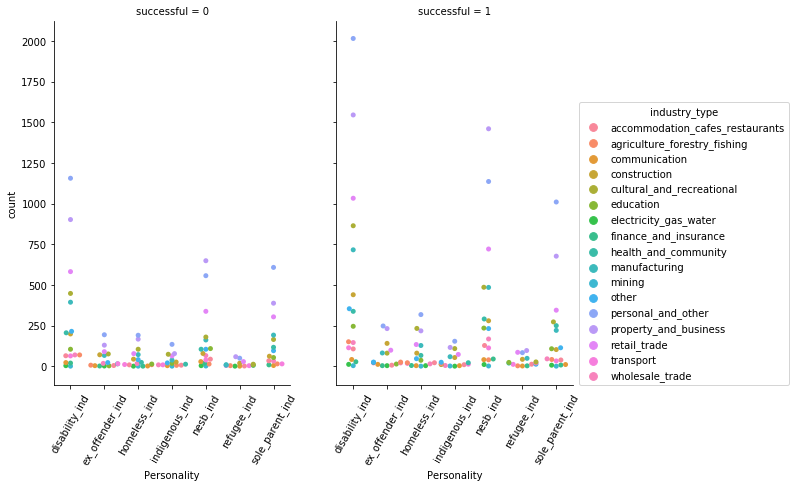

In [5]:

main_person = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter = main_person.query("PersVal == 'Y'")
#Replace the values with numbers to plot graphs
main_filter['PersVal'].replace(to_replace=dict(Y=1, N=0), inplace=True)
main_filter['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
#print(main_filter.head(3))

#Set the index
main_filter.set_index = ['industry_type','successful','Personality']

# Aggregate on 'industry_type','Personality','successful' to get the count of people involved
####Data frame main_aggr will be used in various data visualisation to understand the correlation between the Personality
# of the business owner, Industry type, success rate etc.
main_aggr_Personality = main_filter.groupby(['Personality','successful']).size().rename('count').reset_index()
main_aggr = main_filter.groupby(['industry_type','Personality','successful']).size().rename('count').reset_index()
print(main_aggr.head())

"""Make a bee swarm plot to identify the involvement of communities in the Industries"""
# Make bee swarm plot
#_ = sns.swarmplot(x='Personality',y='count',hue='industry_type',data=main_aggr,dodge=True)
_ = sns.factorplot(x="Personality", y="count",
                        hue="industry_type", col="successful",
                        data=main_aggr, kind="swarm",
                        size=6, aspect=.7);
for ax in _.axes.flatten(): 
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=60)
#plt.xticks(rotation=45)
# Label axes
#_ = plt.xlabel('Personality')
#_ = plt.ylabel('Involvement')

# Show the plot
plt.show()

In [8]:
### NULL Hypothesis tests###
# Hyothesis: Check whether there is equal participation from aboriginal individuals as from the other personalities
#            In other words, whether the aboriginals are participating in the same ratio as that of other personalities?

# Test-Statistic used: Difference in Means

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff
#############################
# Combine the Black and White calls before drawing random data
def permutation_sample(data1, data2):
    #Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
#############################
def draw_perm_reps(data_1, data_2, func, size=1):
    #Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates
#############################
#print(main_melt3.head())
Ind_Business = main_melt3.query("Personality == 'indigenous_ind'")
Ind_Business['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
other_business = main_melt3.query("Personality != 'indigenous_ind'")
other_business['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
Ind_array = Ind_Business['successful'].values.tolist()
other_array = other_business['successful'].values.tolist()


/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [9]:

# Compute the actual fraction
actual_ind = diff_of_means(Ind_array,other_array)

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(Ind_array, other_array, diff_of_means, 1000)


# Compute and print p-value: p. 
p = np.sum(perm_replicates <= actual_ind) / len(perm_replicates) # the fraction should be number of succ.Ind.Business/failed Ind.Business
print('p-value =', p)

p-value = 0.496


In [ ]:
#######################################
# Inference of Hypothesis test
#######################################
# We got a p-Value of 0.496 after conducting the bootstrap tests, which proves that the Null hypothesis is true. 
# i.e. Less Number of participants from Aboriginal community was by chance and Government need not take any 
# additional measures to increase the participation of this community.

In [10]:
# Conduct this hypothesis test with participants having "DISABILITY" indicator
DIS_Business = main_melt3.query("Personality == 'disability_ind'")
DIS_Business['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
other_business = main_melt3.query("Personality != 'disability_ind'")
other_business['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
DIS_array = DIS_Business['successful'].values.tolist()
other_array = other_business['successful'].values.tolist()


# Compute the actual fraction
actual_ind = diff_of_means(DIS_array,other_array)
# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(DIS_array, other_array, diff_of_means, 1000)

# Compute and print p-value: p. 
p = np.sum(perm_replicates <= actual_ind) / len(perm_replicates) # the fraction should be number of succ.Ind.Business/failed Ind.Business
print('p-value =', p)

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


p-value = 0.48


In [ ]:
# P-Value of "Disability indicator" is almost same as that of "Aboriginal indicator". Therefore, we can conclude
# that people belonging to different categories are participating in the program i.e. Identical distribution

In [11]:
# Check whether participants in a particular industry are more successfull than those of others. For instance, 
# participants in "personal and other" industry_type appear to be more successfull than those of their counterparts
# Therefore, calculate p-Value for the distribution of this industry type

# Conduct this hypothesis test with participants having "DISABILITY" indicator
pers_Industry = main_melt3.query("industry_type == 'personal_and_other'")
pers_Industry['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
other_Industry = main_melt3.query("industry_type != 'personal_and_other'")
other_Industry['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
pers_array = pers_Industry['successful'].values.tolist()
other_array = other_Industry['successful'].values.tolist()


# Compute the actual fraction
actual_pers_ind = diff_of_means(pers_array,other_array)
# Acquire permutation samples: perm_replicates
perm_replicates_pers = draw_perm_reps(pers_array, other_array, diff_of_means, 1000)

# Compute and print p-value: p. 
p_pers = np.sum(perm_replicates_pers <= actual_pers_ind) / len(perm_replicates_pers) # the fraction should be number of succ.Ind.Business/failed Ind.Business
print('p-value =', p_pers)

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


p-value = 0.0


In [ ]:
# A p-value of '0.0' implies that personalities involved in industry_type 'personal_and_other' are prone to success
# when compared to others.

# Therefore, Industry_type is an important feature in determination of successfull participants.